### Data Augmentation To Address Overfitting In Flower Classification CNN

Reference: https://www.tensorflow.org/tutorials/images/classification

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Download flowers dataset from googleapi and store locally

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:3]

[PosixPath('datasets/flower_photos/sunflowers/15054751430_5af76f6096_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20344282483_05abb0b837.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4625255191_26e17a28c9_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5193918046_d44e4fcd75_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6732261031_861a1026fa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5333437251_ce0aa6925d_n.jpg')]

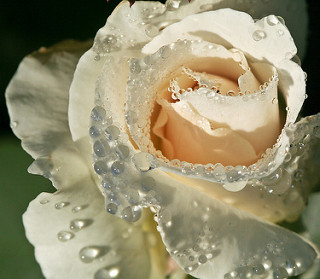

In [8]:
PIL.Image.open(roses[1])

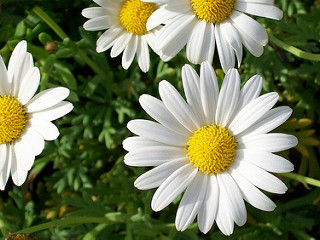

In [9]:
daisys = list(data_dir.glob('daisy/*'))
PIL.Image.open(daisys[1])

Read flowers images from disk into numpy array using opencv

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:3]

[PosixPath('datasets/flower_photos/roses/5193918046_d44e4fcd75_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5193918046_d44e4fcd75_m.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 217, 3)

In [14]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [16]:
X, y = np.array(X), np.array(y)

Train test split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: Scale images
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [18]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.2541 - loss: 1.6787
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5561 - loss: 1.1181
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6532 - loss: 0.8775
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7516 - loss: 0.6867
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8471 - loss: 0.4460
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9136 - loss: 0.2686
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9537 - loss: 0.1628
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9826 - loss: 0.0747
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9914 - loss: 0.0468
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9883 - loss: 0.0548


In [19]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6494 - loss: 2.0351


[2.057678699493408, 0.6372548937797546]

Train accuracy is very high (99%) but, the test accuracy is significantly low (65%) indicating overfitting.   
We can use data augmentation to address overfitting

Data Augmentation

In [20]:
# Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

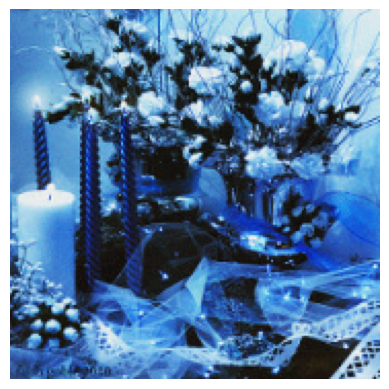

In [21]:
# Original image
plt.axis('off')
plt.imshow(X[0])

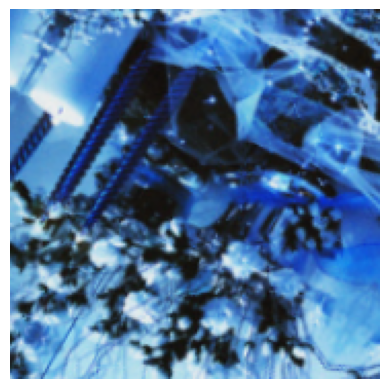

In [22]:
# Augmented image
plt.axis('off')
plt.imshow(data_augmentation(X[:1])[0].numpy().astype('uint8'))

In [25]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3466 - loss: 1.5116
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5220 - loss: 1.1366
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5859 - loss: 1.0013
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6425 - loss: 0.9040
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6548 - loss: 0.8578
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6794 - loss: 0.8098
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6722 - loss: 0.8189
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6934 - loss: 0.7610
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7097 - loss: 0.7594
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7227 - loss: 0.7382
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7257 - loss: 0.7167
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy:

In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7197 - loss: 0.7865


[0.8053575158119202, 0.7167755961418152]

In [29]:
# Save the model in .keras format
model.save('flower_classification_model.keras')

By using data augmentation, the accuracy of test-set predictions is increased to 78%